# Phishing Website Detection by ML Models <br>


In [2]:
!pip install seaborn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [1]:
# importing the pandas package

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

## Loading the data

In [2]:
legitimate_urls = pd.read_csv("extracted_csv_files/legitimate_websites_1.11.csv")
phishing_urls = pd.read_csv("extracted_csv_files/phishing_websites_1.11.csv")

## Getting familiar with data

In [3]:
legitimate_urls.head()

,protocol,domain_name,address,long_url,having_@_symbol,redirection_//_symbol,prefix_suffix_seperation,sub_domains,having_ip_address,shortening_service,https_token,web_traffic,domain_registration_length,dns_record,age_of_domain,statistical_report,label
0,https,enabil.nabilbank.com,#/login,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,https,www.himalayanbank.com,en/,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,https,ibanking.nbbl.com.np,#/login,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,https,www.nbbl.com.np,NaN,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,https,www.netebl.com,corp/AuthenticationController?FORMSGROUP_ID__=...,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [4]:
legitimate_urls.shape

(5717, 17)

In [5]:
phishing_urls.head()

,protocol,domain_name,address,long_url,having_@_symbol,redirection_//_symbol,prefix_suffix_seperation,sub_domains,having_ip_address,shortening_service,https_token,web_traffic,domain_registration_length,dns_record,age_of_domain,statistical_report,label
0,http,shadetreetechnology.com,V4/validation/a111aedc8ae390eabcfa130e041a10a4,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,https,support-appleld.com.secureupdate.duilawyeryork...,ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a...,1,0,0,1,1,0,0,0,1,0,0,0,1,1
2,http,appleid.apple.com-app.es,NaN,0,0,0,1,0,0,0,0,1,1,0,1,1,1
3,http,www.shadetreetechnology.com,V4/validation/ba4b8bddd7958ecb8772c836c2969531,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,http,html.house,l7ceeid6.html,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [6]:
print(phishing_urls.shape)

(5687, 17)


## Data PreProcessing
#### Data is in two data frames so we merge them to make one dataframe


In [7]:
urls = legitimate_urls.append(phishing_urls)

In [8]:
urls.head()

,protocol,domain_name,address,long_url,having_@_symbol,redirection_//_symbol,prefix_suffix_seperation,sub_domains,having_ip_address,shortening_service,https_token,web_traffic,domain_registration_length,dns_record,age_of_domain,statistical_report,label
0,https,enabil.nabilbank.com,#/login,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,https,www.himalayanbank.com,en/,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,https,ibanking.nbbl.com.np,#/login,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,https,www.nbbl.com.np,NaN,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,https,www.netebl.com,corp/AuthenticationController?FORMSGROUP_ID__=...,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [9]:
urls.shape

(11404, 17)

In [10]:
urls.columns

Index(['protocol', 'domain_name', 'address', 'long_url', 'having_@_symbol',
       'redirection_//_symbol', 'prefix_suffix_seperation', 'sub_domains',
       'having_ip_address', 'shortening_service', 'https_token', 'web_traffic',
       'domain_registration_length', 'dns_record', 'age_of_domain',
       'statistical_report', 'label'],
      dtype='object')

In [11]:
urls.describe()

,long_url,having_@_symbol,redirection_//_symbol,prefix_suffix_seperation,sub_domains,having_ip_address,shortening_service,https_token,web_traffic,domain_registration_length,dns_record,age_of_domain,statistical_report,label
count,11404.000000,11404.000000,11404.000000,11404.000000,11404.000000,11404.000000,11404.000000,11404.000000,11404.000000,11404.000000,11404.000000,11404.000000,11404.000000,11404.000000
mean,0.415907,0.021396,0.002631,0.152578,0.068309,0.008506,0.122939,0.014293,0.680200,0.389425,0.108208,0.245265,0.133637,0.498685
std,0.492899,0.144707,0.051225,0.359596,0.252287,0.091838,0.328382,0.118702,0.466419,0.487641,0.310656,0.430263,0.340277,0.500020
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Removing Unnecessary columns

In [12]:
# dropping domain name, path and protocol

urls = urls.drop(urls.columns[[0,1,2]],axis=1)

In [13]:
# checking the urls for null or missing values
urls.isnull().sum()

long_url                      0
having_@_symbol               0
redirection_//_symbol         0
prefix_suffix_seperation      0
sub_domains                   0
having_ip_address             0
shortening_service            0
https_token                   0
web_traffic                   0
domain_registration_length    0
dns_record                    0
age_of_domain                 0
statistical_report            0
label                         0
dtype: int64

#### Since we merged two dataframes top 1000 rows will have legitimate urls and bottom 1000 rows will have phishing urls. So if we split the data now and create a model for it will overfit so we need to shuffle the rows before splitting the data into training set and test set

In [14]:
#displaying summary of the dataset

urls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11404 entries, 0 to 5686
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   long_url                    11404 non-null  int64
 1   having_@_symbol             11404 non-null  int64
 2   redirection_//_symbol       11404 non-null  int64
 3   prefix_suffix_seperation    11404 non-null  int64
 4   sub_domains                 11404 non-null  int64
 5   having_ip_address           11404 non-null  int64
 6   shortening_service          11404 non-null  int64
 7   https_token                 11404 non-null  int64
 8   web_traffic                 11404 non-null  int64
 9   domain_registration_length  11404 non-null  int64
 10  dns_record                  11404 non-null  int64
 11  age_of_domain               11404 non-null  int64
 12  statistical_report          11404 non-null  int64
 13  label                       11404 non-null  int64
dtypes: int6

In [15]:
#displaying data in ana easier manner to read
urls.head(10).T

,0,1,2,3,4,5,6,7,8,9
long_url,0,0,0,0,1,0,0,0,0,0
having_@_symbol,0,0,0,0,0,0,0,0,0,0
redirection_//_symbol,0,0,0,0,0,0,0,0,0,0
prefix_suffix_seperation,0,0,0,0,0,0,0,0,0,0
sub_domains,0,0,0,0,0,0,0,0,0,0
having_ip_address,0,0,0,0,0,0,0,0,0,0
shortening_service,0,0,0,0,0,0,0,0,0,0
https_token,0,0,0,0,0,0,0,0,0,0
web_traffic,1,0,0,0,0,0,0,0,0,0
domain_registration_length,0,1,1,1,1,0,0,0,0,1


In [16]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
urls = urls.sample(frac=1).reset_index(drop=True)

In [17]:
urls.head()

,long_url,having_@_symbol,redirection_//_symbol,prefix_suffix_seperation,sub_domains,having_ip_address,shortening_service,https_token,web_traffic,domain_registration_length,dns_record,age_of_domain,statistical_report,label
0,1,0,0,0,0,0,0,0,1,1,0,1,0,1
1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,0,0,1,1,0,1,1,1
3,1,0,0,0,0,0,0,0,1,1,0,1,1,1
4,1,0,0,0,0,0,0,1,1,1,0,0,0,1


#### Quick observation: 
The dataset has no null values. So further processing will not be done such as replace or deleting null rows. data is ready for traning, before training we visualise the data

# Visually Displaying data

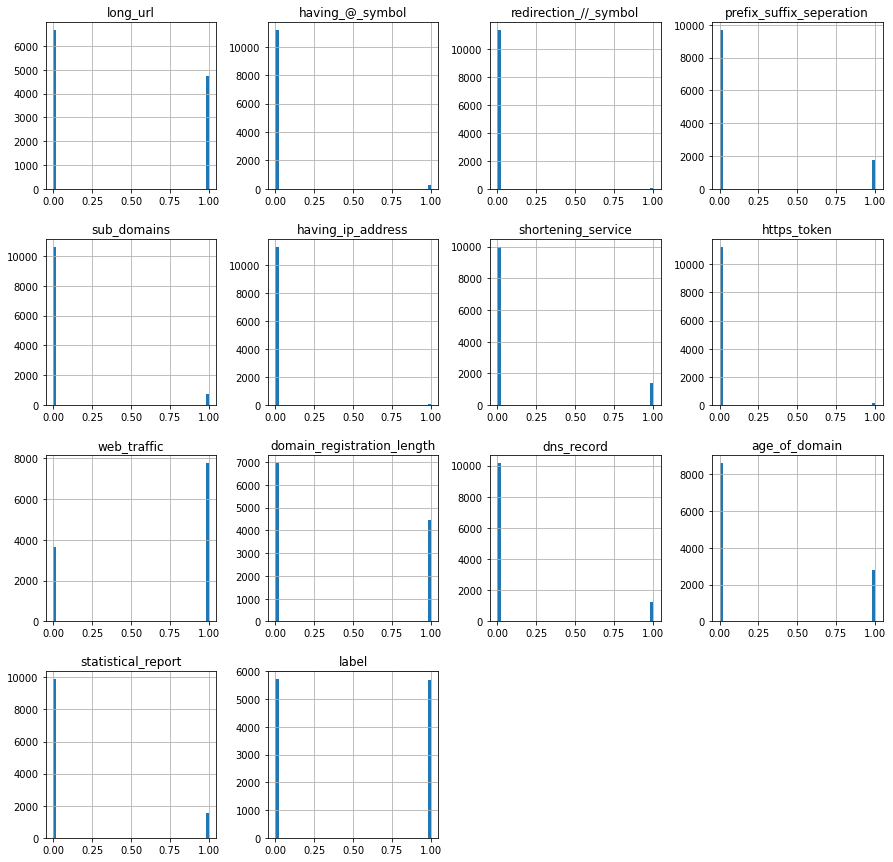

In [18]:
#Plotting the data distribution with a histogram
urls.hist(bins = 50,figsize = (15,15))
plt.show()

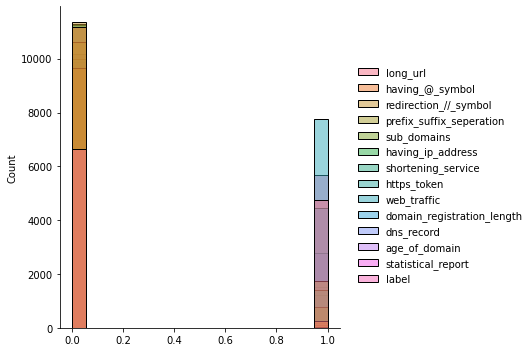

In [19]:
#overall distribution of continuous data variables
plot = sns.displot(urls)

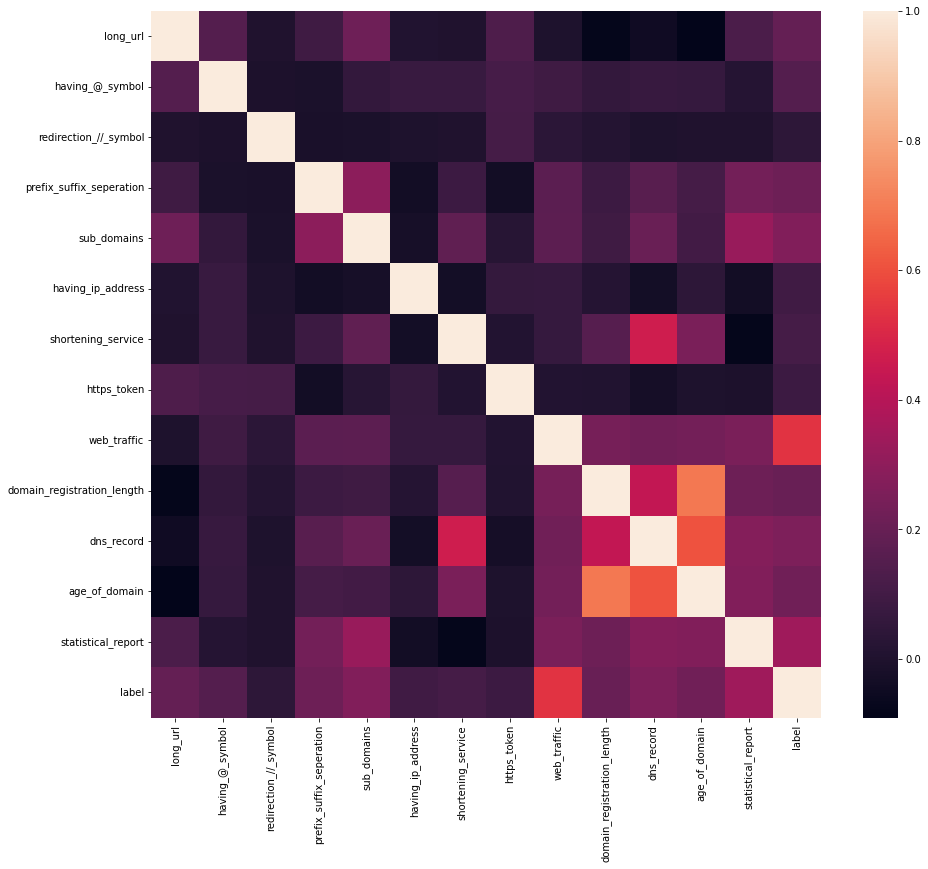

In [20]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(urls.corr())
plt.show()

<AxesSubplot:>

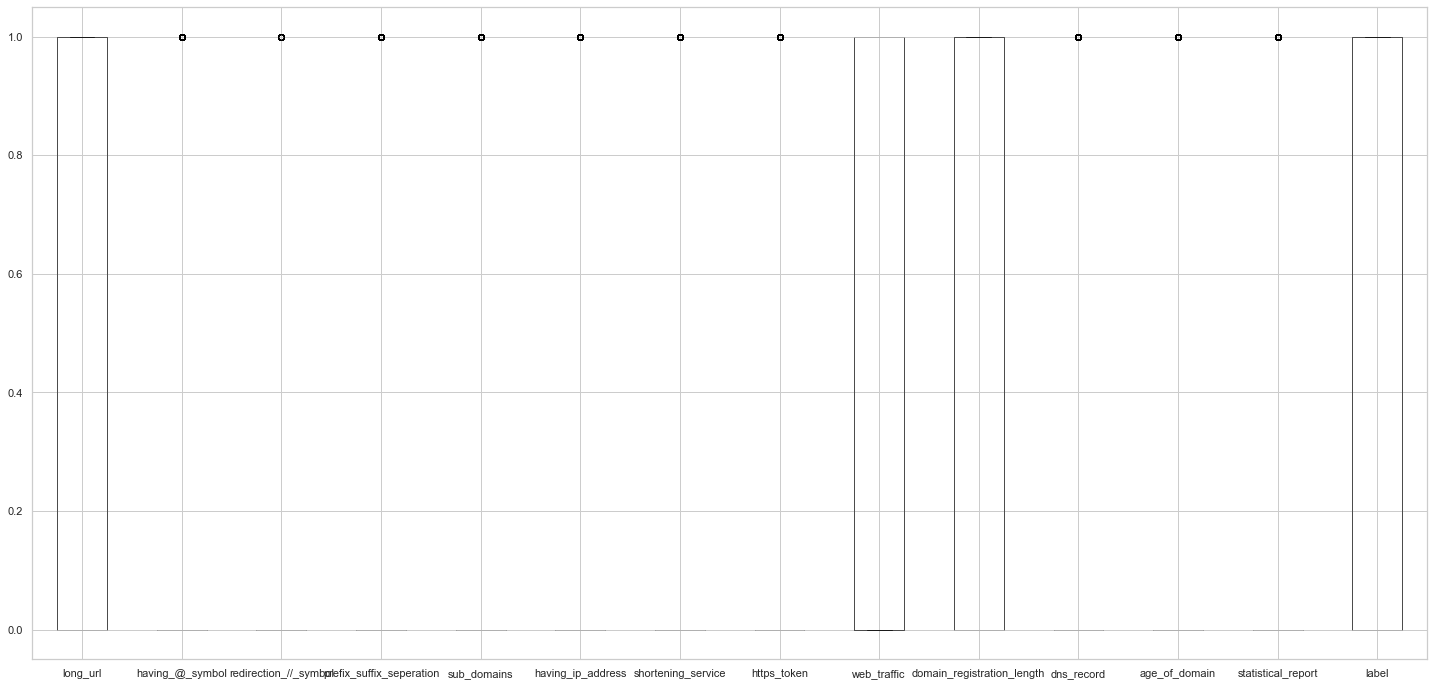

In [21]:
sns.set(style="whitegrid")
urls.boxplot(figsize=(25,12))

# Feature Selection 

In [22]:
labels = urls['label'] # target variable

In [23]:
urls_without_labels = urls.drop('label',axis=1) # feature variables

In [24]:
urls_without_labels.columns

Index(['long_url', 'having_@_symbol', 'redirection_//_symbol',
       'prefix_suffix_seperation', 'sub_domains', 'having_ip_address',
       'shortening_service', 'https_token', 'web_traffic',
       'domain_registration_length', 'dns_record', 'age_of_domain',
       'statistical_report'],
      dtype='object')

In [25]:
labels.shape

(11404,)

# Splitting the data into train data and test data

In [88]:
data_train, data_test, labels_train, labels_test = train_test_split(urls_without_labels, labels, test_size=0.20, random_state=101)

In [89]:
print((data_train.shape),(data_test.shape),(labels_train.shape),(labels_test.shape))

(9123, 13) (2281, 13) (9123,) (2281,)


In [90]:
labels_train.value_counts()

1    4566
0    4557
Name: label, dtype: int64

In [91]:
labels_test.value_counts()

0    1160
1    1121
Name: label, dtype: int64

# Machine Learning Models
From the dataset above, We have learnt that this is a supervised machine learning. This dataset uses a classification problem, it has input URL classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:

<li> Naive Bayes
<li> Decision Tree
<li> RandomForestClassifiers
<li> XGBoost

In [141]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
elapsed_time3 = []
#function to call for storing the results
def storeResults(model, a,b,c):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))
    elapsed_time3.append(round(c, 3))

# 1. Naive Bayes

In [142]:
from sklearn.naive_bayes import GaussianNB
import time
gnb = GaussianNB()

In [143]:
start_time0 = time.time()
gnb.fit(data_train,labels_train)
elapsed_time0 = time.time() - start_time0

### predicting the result for test data

In [144]:
y_predict = gnb.predict(data_test)
y_test_NB = gnb.predict(data_test)
y_train_NB = gnb.predict(data_train)
model_score = model.score(data_test, labels_test)

## Performance Evaluation: 

In [145]:
#computing the accuracy of the model performance
acc_train_model = accuracy_score(labels_train,y_train_NB)
acc_test_model = accuracy_score(labels_test,y_test_NB)

print(f'{elapsed_time0:.5f}s elapsed during training')
print("Naive Bayes: Accuracy on the Model: ",model_score)
print("Naive Bayes: Accuracy on training Data: {:.3f}".format(acc_train_model))
print("Naive Bayes: Accuracy on test Data: {:.3f}".format(acc_test_model))
print(metrics.classification_report(labels_test, y_predict))
print(metrics.confusion_matrix(labels_test, y_predict))

0.01227s elapsed during training
Naive Bayes: Accuracy on the Model:  0.7786058746163963
Naive Bayes: Accuracy on training Data: 0.670
Naive Bayes: Accuracy on test Data: 0.682
              precision    recall  f1-score   support

           0       0.62      0.99      0.76      1160
           1       0.96      0.37      0.53      1121

    accuracy                           0.68      2281
   macro avg       0.79      0.68      0.65      2281
weighted avg       0.79      0.68      0.65      2281

[[1144   16]
 [ 709  412]]


In [146]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Naive Bayes', acc_train_model, acc_test_model,elapsed_time0)

# 2. Decision Tree Classifier

In [147]:
from sklearn.tree import DecisionTreeClassifier
import time
start_time = time.time()
# instantiate the model
model = DecisionTreeClassifier()
# fit the model 
model.fit(data_train,labels_train)
elapsed_time = time.time() - start_time
# predicting the result for test data
y_predict_tree = model.predict(data_test)
y_test_tree = model.predict(data_test)
y_train_tree = model.predict(data_train)

tree_score = model.score(data_test, labels_test)

#### Performance Evaluation:

In [148]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(labels_train,y_train_tree)
acc_test_tree = accuracy_score(labels_test,y_test_tree)

print(f'{elapsed_time:.5f}s elapsed during training')
print("Decision Tree: Accuracy on the Model: ",tree_score)
print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print(metrics.classification_report(labels_test, y_predict_tree))
print(metrics.confusion_matrix(labels_test, y_predict_tree))

0.01313s elapsed during training
Decision Tree: Accuracy on the Model:  0.7786058746163963
Decision Tree: Accuracy on training Data: 0.783
Decision Tree: Accuracy on test Data: 0.779
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1160
           1       0.78      0.77      0.77      1121

    accuracy                           0.78      2281
   macro avg       0.78      0.78      0.78      2281
weighted avg       0.78      0.78      0.78      2281

[[917 243]
 [262 859]]


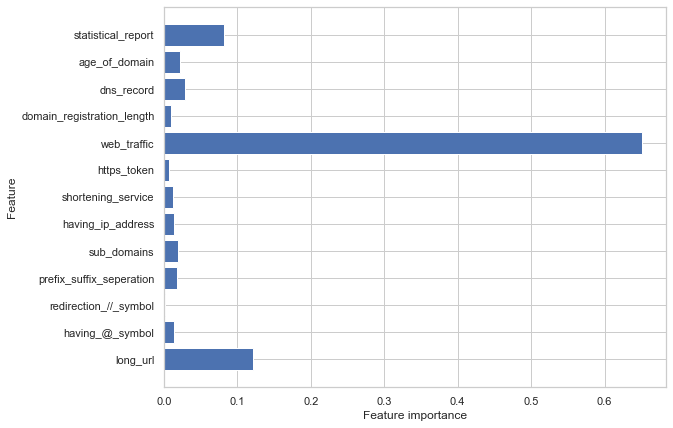

In [149]:
#checking the feature importance in the model to highlight which features may be most relevant to the target
plt.figure(figsize=(9,7))
n_features = data_train.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), data_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [150]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree,elapsed_time)

# 3. Random Forest Classifier

In [151]:
from sklearn.ensemble import RandomForestClassifier
# instantiate the model
forest = RandomForestClassifier(n_estimators=100,max_depth=30,max_leaf_nodes=10000)

start_time1 = time.time()

# fit the model 
forest.fit(data_train, labels_train)
elapsed_time1 = time.time() - start_time1


# Predicting the result for Test Data
y_test_forest = forest.predict(data_test)
y_train_forest = forest.predict(data_train)
model_score = model.score(data_test, labels_test)

### Performance Evaluation

In [152]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(labels_train,y_train_forest)
acc_test_forest = accuracy_score(labels_test,y_test_forest)

print(f'{elapsed_time1:.5f}s elapsed during training')

print("Random forest: Accuracy on the Model: ",model_score)
print("Random forest: Accuracy on training Data: {:.4f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.4f}".format(acc_test_forest))
print(metrics.classification_report(labels_test, y_test_forest))
print(metrics.confusion_matrix(labels_test, y_test_forest))

0.49774s elapsed during training
Random forest: Accuracy on the Model:  0.7786058746163963
Random forest: Accuracy on training Data: 0.7833
Random forest: Accuracy on test Data: 0.7760
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1160
           1       0.77      0.77      0.77      1121

    accuracy                           0.78      2281
   macro avg       0.78      0.78      0.78      2281
weighted avg       0.78      0.78      0.78      2281

[[908 252]
 [259 862]]


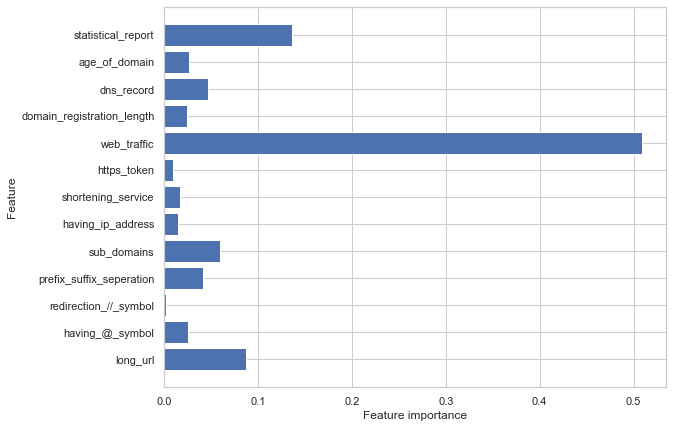

In [153]:
#checking the feature importance in the model to highlight which features may be most relevant to the target
plt.figure(figsize=(9,7))
n_features = data_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), data_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [154]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random forest', acc_train_forest, acc_test_forest,elapsed_time1)

# 4. XGBoostClassifier

In [155]:
# 5. XGBoost Classifier
start_time2 = time.time()
# instantiate the model
xgb = XGBClassifier(use_label_encoder =False,learning_rate=0.3,max_depth=7)
#fit the model
xgb.fit(data_train, labels_train)
elapsed_time2 = time.time() - start_time2
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(data_test)
y_train_xgb = xgb.predict(data_train)
model_score=xgb.score(data_test, labels_test)

[18:17:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Performance Evaluation:



In [156]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(labels_train,y_train_xgb)
acc_test_xgb = accuracy_score(labels_test,y_test_xgb)

print(f'{elapsed_time2:.5f}s elapsed during training')

print("XGBoost: Accuracy on the Model: ",model_score)
print("XGBoost: Accuracy on training Data: {:.4f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.4f}".format(acc_test_xgb))
print(metrics.classification_report(labels_test, y_test_xgb))
print(metrics.confusion_matrix(labels_test, y_test_xgb))

0.98093s elapsed during training
XGBoost: Accuracy on the Model:  0.775975449364314
XGBoost: Accuracy on training Data: 0.7827
XGBoost : Accuracy on test Data: 0.7760
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1160
           1       0.77      0.77      0.77      1121

    accuracy                           0.78      2281
   macro avg       0.78      0.78      0.78      2281
weighted avg       0.78      0.78      0.78      2281

[[910 250]
 [261 860]]


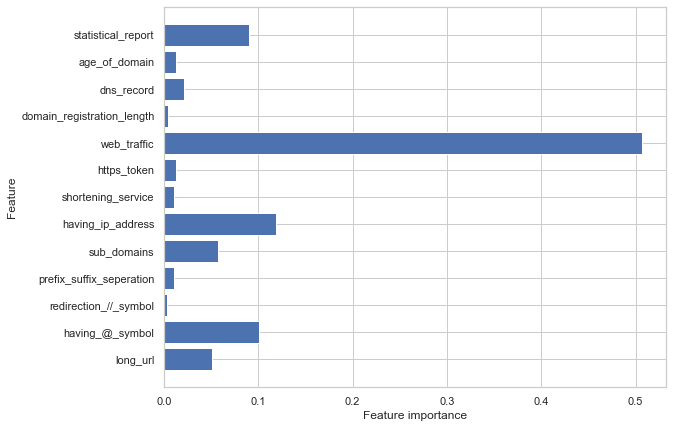

In [157]:
#checking the feature importance in the model to highlight which features may be most relevant to the target
plt.figure(figsize=(9,7))
n_features = data_train.shape[1]
plt.barh(range(n_features), xgb.feature_importances_, align='center')
plt.yticks(np.arange(n_features), data_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [158]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb,elapsed_time2)

# Comparision of Models

To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [161]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Training Time' : elapsed_time3})
results

,ML Model,Train Accuracy,Test Accuracy,Training Time
0,Naive Bayes,0.670,0.682,0.012
1,Decision Tree,0.783,0.779,0.013
2,Random forest,0.783,0.776,0.498
3,XGBoost,0.783,0.776,0.981


In [162]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy,Training Time
1,Decision Tree,0.783,0.779,0.013
2,Random forest,0.783,0.776,0.498
3,XGBoost,0.783,0.776,0.981
0,Naive Bayes,0.670,0.682,0.012


From the above comparision, it is clear that the XGBoost Classifier works well with this dataset. and can be used to further study the problem

In [50]:
import pickle

In [80]:
# best model 

bmodel = RandomForestClassifier(max_depth = 5)
bmodel.fit(data_train, labels_train)
y_pred_train = bmodel.predict(data_train)
y_pred_test = bmodel.predict(data_test)

In [81]:
filename = 'RFmodel_12000.sav'
pickle.dump(bmodel, open(filename, 'wb'))

In [83]:
filename = 'XGBoostModel_12000.sav'

pickle.dump(xgb, open('GUI/'+filename, "wb"))


THE END